# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
print(X)
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

(784, 200)
0 [False]
1 [False]
2 [False]
3 [ True]
4 [False]
5 [False]
6 [False]
7 [False]
8 [False]
9 [False]
10 [False]
11 [False]
12 [False]
13 [False]
14 [False]
15 [False]
16 [False]
17 [False]
18 [False]


KeyboardInterrupt: 

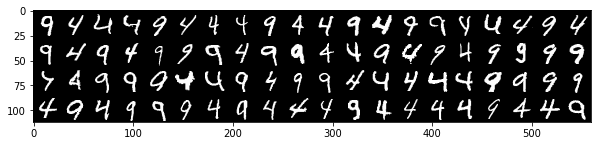

In [35]:
show_digit(X)
# Do feature normalization here
# begin answer
from scipy import stats
X_nor = (X - np.mean(X)) / np.std(X)
X_test_nor = stats.mstats.zscore(X_test)
# end answer
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')
from ridge import ridge
print(X.shape)
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X_nor, j, axis = 1)  # take point j out of X
        y_ = np.delete(y, j, axis = 1)
        w = ridge(X_, y_, lmbdas[i])
        X_val = X_nor[:, [j]]
        y_val = y[:, j]
        y_h = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_val.shape[1])), X_val))))
        E_val = E_val + (y_h[0] != y_val[0])
        print(j, y_h[0] != y_val[0])
    print(E_val)
    E_val /= X.shape[1]
    # Update lmbda according validation error
    # begin answer
    print(lmbdas[i], E_val)
    if E_val_min > E_val:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = __  # take point j out of X
        y_ = __ 
        w = ridge(X, y, lmbdas[i])
        E_val = Eval + __

    # Update lmbda according validation error
    # begin answer
    # end answer
    
# Compute training error

# Do feature normalization to X_test, y_test
# ...
# Compute test error

### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [ ]:
from logistic_r import logistic_r

lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = __  # take point j out of X
        y_ = __ 
        w = logistic_r(X, y, lmbdas[i])
        E_val = Eval + __
        
    # Update lmbda according validation error
    # begin answer
    # end answer
    
# Compute training error


# Compute test error